In [1]:
import pandas as pd
import pickle
import requests
import json
import os
import yaml
from watson_developer_cloud import DiscoveryV1

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/jonathanhilgart/anaconda/envs/mbti_classification/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
credentials = yaml.load(open(os.path.expanduser('~/.ssh/watson_cred.yml')))

In [4]:
discovery = DiscoveryV1(
        username=credentials['WatsonDiscovery1']['username'],
        password=credentials['WatsonDiscovery1']['password'],
        version="2016-12-01")

In [5]:
environ = discovery.get_environments()
environ

{'environments': [{'created': '2017-06-02T17:23:28.167Z',
   'description': 'Watson News cluster environment',
   'environment_id': '32955422-7b8b-43f3-8962-0f43867427a1',
   'name': 'Watson News Environment',
   'read_only': True,
   'status': 'active',
   'updated': '2017-06-02T17:23:28.167Z'}]}

In [6]:
environ_id = environ['environments'][0]['environment_id']

In [7]:
environ_id

'32955422-7b8b-43f3-8962-0f43867427a1'

In [8]:
collection = discovery.list_collections(environ_id)
collection

{'collections': [{'collection_id': '14a7d9a5-8d64-4f91-ad17-3a6b2db45ba3',
   'configuration_id': '978d9807-6d1f-4cda-bb69-1b5c5df7e1a7',
   'created': '2017-06-02T17:23:28.261Z',
   'description': 'Watson News pre-enriched collection of curated news sources',
   'language': None,
   'name': 'watson_news',
   'status': 'active',
   'updated': '2017-06-02T17:23:28.261Z'}]}

In [9]:
collection_id = collection['collections'][0]['collection_id']

if: "language": "portuguese"

In [36]:
qopts = {'query': 'Bill Gates'}
my_query = discovery.query(environ_id ,collection_id, qopts)
print(json.dumps(my_query, indent=2))

{
  "matching_results": 1667914,
  "results": [
    {
      "id": "cc0ea812a2de55a6917ef775c77b349f",
      "score": 3.9357285,
      "yyyymm": "201704",
      "author": "VW Staff",
      "entities": [
        {
          "count": "2",
          "disambiguated": {
            "opencyc": "http://sw.opencyc.org/concept/Mx4rvYwpvpwpEbGdrcN5Y29ycA",
            "website": "http://www.microsoft.com/presspass/exec/billg/default.mspx",
            "name": "Bill Gates",
            "dbpedia": "http://dbpedia.org/resource/Bill_Gates",
            "freebase": "http://rdf.freebase.com/ns/m.017nt",
            "yago": "http://yago-knowledge.org/resource/Bill_Gates",
            "subType": [
              "BoardMember",
              "ChivalricOrderMember",
              "CompanyFounder",
              "TVActor",
              "VideoGameDeveloper"
            ]
          },
          "sentiment": {
            "score": "0.317821",
            "type": "positive"
          },
          "text": "Bill 

In [37]:
my_query['results'][0].keys()

dict_keys(['id', 'score', 'yyyymm', 'author', 'entities', 'taxonomy', 'url', 'usage', 'enrichedTitle', 'host', 'text', 'concepts', 'publicationDate', 'language', 'alchemyapi_text', 'status', 'relations', 'keywords', 'title', 'docSentiment', 'totalTransactions', 'blekko', 'yyyymmdd', 'ac_suggest'])

In [38]:
my_query['results']

[{'ac_suggest': ['Bill Gates',
   'Bill & Melinda Gates Foundation',
   'Melinda Gates',
   'Paul Allen',
   'Bill Gates',
   'co-chairman',
   'Neglected Tropical Diseases',
   'President Trump',
   'Microsoft',
   'co-founder',
   'Melinda Gates Foundation',
   'Bloomberg',
   'Gates Foundation co-chairman',
   'Neglected Tropical Diseases',
   'Manus Cranny',
   'President Trump',
   'Microsoft co-founder',
   'London Declaration',
   'Bloomberg',
   'Melinda',
   'anniversary'],
  'alchemyapi_text': ' Bill Gates, Microsoft co-founder and Bill & Melinda Gates Foundation co-chairman, discussed the fifth anniversary of the London Declaration on Neglected Tropical Diseases, working with President Trump and Brexit with Bloomberg’s Manus Cranny on Monday.\n',
  'author': 'VW Staff',
  'blekko': {'basedomain': 'valuewalk.com',
   'chrondate': 1492619262,
   'clean_title': ['Bill Gates On Tropical Diseases, Trump And Brexit'],
   'documentType': 'news',
   'hasArticleImage': 1,
   'host': 

In [39]:
[i['docSentiment'] for i in my_query['results']]

[{'type': 'neutral'},
 {'mixed': '1', 'score': '0.386638', 'type': 'positive'},
 {'score': '0.937782', 'type': 'positive'},
 {'mixed': '1', 'score': '0.248085', 'type': 'positive'},
 {'score': '', 'type': ''},
 {'mixed': '1', 'score': '0.0534039', 'type': 'positive'},
 {'mixed': '1', 'score': '0.0534039', 'type': 'positive'},
 {'mixed': '1', 'score': '0.0534039', 'type': 'positive'},
 {'score': '0.860944', 'type': 'positive'},
 {'mixed': '1', 'score': '0.401399', 'type': 'positive'}]

In [40]:
[i['entities'] for i in my_query['results']]

[[{'count': '2',
   'disambiguated': {'dbpedia': 'http://dbpedia.org/resource/Bill_Gates',
    'freebase': 'http://rdf.freebase.com/ns/m.017nt',
    'name': 'Bill Gates',
    'opencyc': 'http://sw.opencyc.org/concept/Mx4rvYwpvpwpEbGdrcN5Y29ycA',
    'subType': ['BoardMember',
     'ChivalricOrderMember',
     'CompanyFounder',
     'TVActor',
     'VideoGameDeveloper'],
    'website': 'http://www.microsoft.com/presspass/exec/billg/default.mspx',
    'yago': 'http://yago-knowledge.org/resource/Bill_Gates'},
   'knowledgeGraph': {'typeHierarchy': '/products/gates/bill gates'},
   'relevance': '0.33',
   'sentiment': {'score': '0.317821', 'type': 'positive'},
   'text': 'Bill Gates',
   'type': 'Person'},
  {'count': '1',
   'relevance': '0.33',
   'sentiment': {'type': 'neutral'},
   'text': 'co-chairman',
   'type': 'JobTitle'},
  {'count': '1',
   'knowledgeGraph': {'typeHierarchy': '/issues/causes/diseases/neglected tropical diseases'},
   'relevance': '0.33',
   'sentiment': {'score'

In [41]:
[i['alchemyapi_text'] for i in my_query['results']]

[' Bill Gates, Microsoft co-founder and Bill & Melinda Gates Foundation co-chairman, discussed the fifth anniversary of the London Declaration on Neglected Tropical Diseases, working with President Trump and Brexit with Bloomberg’s Manus Cranny on Monday.\n',
 'Warren Buffett & Bill Gates At Columbia University January 2017 - ValueWalk\n                   \n      About About ValueWalk Corporation \nPremium explainer Member Login \nPassword Reset \nProfile \nPremium Sign Up Explainer \n\n\nContact \nGuest Posts And Hedge Fund Letters \nAdvertise \nDonate to ValueWalk \nComments Policy \nAuthors \nDMCA Legal Disclaimer \nDMCA \n\n\n\n\nBooks Editors’ Full List of Book Recommendations \nEditors Favorite Ten Books \nRecommendations For Beginners \nMichael Burry’s List \nTom Gayner’s List \nDonald Yacktman’s List \nEddie Lampert’s List \nBill Gates’ List \nPeter Cundill’s List \nJohn Griffin’s List \nRay Dalio’s List \nHoward Marks’ List \nCharlie Munger’s List \nBill Ackman’s List \nDan Lo

In [42]:
[i['text'] for i in my_query['results']]

['\ufeff\n\nBill Gates On Tropical Diseases, Trump And Brexit\n\nBill Gates, Microsoft co-founder and Bill & Melinda Gates Foundation co-chairman, discussed the fifth anniversary of the London Declaration on Neglected Tropical Diseases, working with President Trump and Brexit with Bloomberg’s Manus Cranny on Monday.\n\nBill Gates On Tropical Diseases, Trump And Brexit\n\nBill Gates\n\n',
 '\ufeff\n\nWarren Buffett & Bill Gates At Columbia University January 2017\n\nPublished on Jan 27, 2017\n\nWarren Buffett & Bill Gates At Columbia University January 2017.Discussing the hopes of our Future and Answering Q&A’s from the Students at Columbia University.Warren Buffett and Bill Gates discuss about Dreams,Vaccines and Immigration.Warren Buffett And Bill Gates In a Conversation with Charlie Rose.\n\n',
 'Thursday, May 25, 2017\n\nBill Gates Speech at Harvard in 2007\n\nVideo length: 5:55\n\n',
 'Skip to main content\n\nSearch form\n\nSearch\n\nTwo scholars share Bill Gates Sr. Award\n\n',
 '

## Get search terms

In [9]:
companies = pd.read_csv('SVB Niche Finder Example Companies - Yes_DisoveryNews.csv')

In [10]:
companies_set1 = companies.iloc[:2]

In [16]:
companies.head()

,Watson Discovery Query Term,Watson Discovery Filter Term,Wiki Page Title,Company,Sales SubSector,Sales Niche,Unnamed: 6
0,Amazon.com,NaN,Amazon.com,Amazon,Commerce,e-Commerce,NaN
1,Jet.com,NaN,Jet.com,Jet,Commerce,e-Commerce,NaN
2,Fab.com,e-commerce,Fab (website),Fab,Commerce,e-Commerce,NaN
3,Lyst,NaN,Lyst,Lyst,Commerce,e-Commerce,NaN
4,Baublebar,NaN,Baublebar,Baublebar,Commerce,Retail Brands,NaN


In [13]:
#test_companies

In [14]:
def update_query_log(query_log,query_options,query=None):
    '''updates a dictionary that keeps track of 
    whether or not a query to DiscoveryNews was successful and, if it was,
    stores the number of results returned by the query'''
    
    company = query_options['query']
    print(company)
    
    #if company not in query_log.keys():
        #co_index = 1
        #query_log[company] = {}
        #query_log[company+"_1"]['query_count'] = co_index
         
    #else:
        #query_log[company+"_1"]['query_count']+=1
        #co_index = query_log[company+"_1"]['query_count']
        #query_log[company+'_'+str(co_index)] = {}
        
    query_log[company] = {}
    
    if query == None:
        query_log[company]['total_results'] = 'query_error'
        query_log[company]['returned_results'] = 'query_error'
    else:
        query_log[company]['total_results'] = query['matching_results']
        query_log[company]['returned_results'] = len(query['results'])
        
    return query_log

In [17]:
query_options = {'query':'Jet.com'}
q = discovery.query(environ_id, collection_id, query_options)

In [33]:
filename = './NewsResults/'+companies['Company'][1]+'.pickle'
with open(filename,'wb') as handle:
    pickle.dump(q, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [34]:
#TO READ THE PICKLED DICTIONARY BACK IN
with open(filename, 'rb') as handle:
    b = pickle.load(handle)

In [24]:
q

{'matching_results': 2646,
 'results': [{'ac_suggest': ['Login',
    'User',
    'Access code',
    'Social network service',
    'Walmart',
    'Facebook',
    'USA',
    'Washington',
    'Log Out',
    'USA TODAY',
    'social network',
    'Google',
    'in-store pickup orders',
    'online in-store pickup',
    'Best-Selling Books',
    'Facebook  Email  Twitter',
    'Photo galleries',
    'News tips',
    'print edition subscriber',
    'Google+  LinkedIn  Pinterest',
    'Facebook feed',
    'Facebook Sign',
    'Walmart',
    'Open settings',
    'Close settings',
    'home delivery',
    'account settings',
    'digital access',
    'social network',
    'Conversation Guidelines',
    'discounts',
    'Google Sign',
    'email address',
    'Thanks',
    'Newsstand',
    'USA',
    'Interactives',
    'Moonlighting',
    'Apps',
    'Crosswords',
    'Jet.com',
    'Corrections'],
   'alchemyapi_text': "Walmart to offer discounts for online in-store pickup orders\n \n\nSUBSCR

In [36]:
def query_DiscoveryNews(companies_DF,results_per_company):
    
    query_log = {}
    news_niches_df = None
    
    for i in range(len(companies_DF)):

        row = pd.DataFrame(companies_DF.ix[i]).T
        query_options={}
        query_options['query'] = row['Watson Discovery Query Term'][i]
        
        if type(row['Watson Discovery Filter Term'][i])==str:
            query_options['filter'] = row['Watson Discovery Filter Term'][i]
        query_options['count'] = results_per_company

        
        try: 
            my_query = discovery.query(environ_id, collection_id, query_options)
            #print('query_log_a = ', query_log)
            
            filename = './NewsResults/'+companies['Company'][i]+'.pickle'
            with open(filename,'wb') as handle:
                pickle.dump(my_query, handle, protocol=pickle.HIGHEST_PROTOCOL)
            
            #update query_log
            query_log = update_query_log(query_log,query_options,my_query)
            
            #print('query_log_b = ', query_log," i=",i)
        
        except:
            print('could not query company')
            query_log = update_query_log(query_log,query_options)
            continue
            
            #try: 
                #send my_query to S3 bucket using boto and json dumps
            
            #build text corpus data frame 
            
        try:
            company = query_options['query']
            subsector = companies[companies['Watson Discovery Query Term'] == company]['Sales SubSector'].item()
            niche = companies[companies['Watson Discovery Query Term'] == company]['Sales Niche'].item()
            nb_results = len(my_query['results'])
        
        except: print('could not build subsector, niche, and company values')
        
        try:
            for j in range(nb_results):
                new_entry = {}
                if my_query['results'][j]['language'] == 'english':
                    new_entry['id'] = my_query['results'][j]['id']
                    new_entry['title'] = my_query['results'][j]['title']
                    new_entry['text'] = my_query['results'][j]['text']
                    new_entry['alchemyapi_text'] = my_query['results'][j]['alchemyapi_text']
                    new_entry['subsector'] = subsector
                    new_entry['niche'] = niche
                    new_entry['company'] = company
                
                else: 
                    print('not_english in ', company,' at j = ', j)
                    continue
        
                if i == 0 and j==0:
                    news_niches_df = pd.DataFrame.from_dict(new_entry,orient='index').T
            
                else:
                    new_row = pd.DataFrame.from_dict(new_entry,orient='index').T
                    news_niches_df = pd.concat([news_niches_df,new_row])
        
        except:
            print('error in trying to add a row to corpus df at iteration j = ',j)
          
    news_niches_df = news_niches_df.reset_index().drop(['index'],axis=1)  
    
    return news_niches_df,query_log

In [37]:
news_niches_df,log = query_DiscoveryNews(companies,50)

Amazon.com
not_english in  Amazon.com  at j =  3
not_english in  Amazon.com  at j =  21
not_english in  Amazon.com  at j =  35
not_english in  Amazon.com  at j =  47
not_english in  Amazon.com  at j =  48
Jet.com
Fab.com
not_english in  Fab.com  at j =  5
Lyst
not_english in  Lyst  at j =  2
not_english in  Lyst  at j =  3
not_english in  Lyst  at j =  4
not_english in  Lyst  at j =  5
not_english in  Lyst  at j =  6
not_english in  Lyst  at j =  8
not_english in  Lyst  at j =  15
not_english in  Lyst  at j =  17
not_english in  Lyst  at j =  18
not_english in  Lyst  at j =  19
not_english in  Lyst  at j =  20
not_english in  Lyst  at j =  30
not_english in  Lyst  at j =  31
not_english in  Lyst  at j =  32
not_english in  Lyst  at j =  34
not_english in  Lyst  at j =  39
not_english in  Lyst  at j =  40
not_english in  Lyst  at j =  41
not_english in  Lyst  at j =  43
not_english in  Lyst  at j =  44
not_english in  Lyst  at j =  45
not_english in  Lyst  at j =  46
Baublebar
error in 

In [38]:
log

{'2U': {'returned_results': 50, 'total_results': 766},
 '2nd Watch': {'returned_results': 50, 'total_results': 80016},
 '8i': {'returned_results': 50, 'total_results': 199},
 'Aaptiv': {'returned_results': 41, 'total_results': 41},
 'Airbnb': {'returned_results': 50, 'total_results': 40960},
 'AltspaceVR': {'returned_results': 50, 'total_results': 59},
 'Amazon.com': {'returned_results': 50, 'total_results': 38318},
 'Apigee': {'returned_results': 50, 'total_results': 96},
 'Atheer': {'returned_results': 41, 'total_results': 41},
 'Atlassian': {'returned_results': 50, 'total_results': 3458},
 'Axway': {'returned_results': 50, 'total_results': 169},
 'Baublebar': {'returned_results': 50, 'total_results': 240},
 'Bill.com': {'returned_results': 31, 'total_results': 31},
 'Birchbox': {'returned_results': 50, 'total_results': 929},
 'Blend.com': {'returned_results': 3, 'total_results': 3},
 'Blucora': {'returned_results': 50, 'total_results': 125},
 'Bluefin Labs': {'returned_results': 50,

In [40]:
filename = './NewsResults/_2MAY17_log.pickle'
with open(filename,'wb') as handle:
    pickle.dump(log, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [41]:
len(news_niches_df)

7176

In [42]:
news_niches_df.to_pickle('news_niches_df_2MAY17.p')

In [43]:
news_niches_df.iloc[500:1000]

,id,title,text,alchemyapi_text,subsector,niche,company
500,314dc7ee55ef4bd7c446b30a5d4f04e5,Lawmakers to take aim at parking headaches in ...,4/21-23 Philadelphia Antiques & Art Show\n\nAp...,Have problems finding a parking spot in Philad...,Commerce,On-Demand Services,Luxe
501,2c91cc7abc8bfb6da2e89e0168139d05,Designer’s maximalist Soho loft seeks $10M,✕\n\nDesigner’s maximalist Soho loft seeks $10...,"Closings only began last year at 10 Sullivan, ...",Commerce,On-Demand Services,Luxe
502,bab730a5549e9f084583a7cf1b993c5a,Postmates Delivers Promising Forecast,﻿\n\nPostmates Delivers Promising Forecast\n\n...,Food delivery company Postmates is said to be ...,Commerce,On-Demand Services,Postmates
503,28eb14ff26ecccd5d8b53f2fb9fdc356,Win a $500 Postmates Gift Card!,What's Trending\n\nWin a $500 Postmates Gift C...,Win a $500 Postmates Gift Ca...,Commerce,On-Demand Services,Postmates
504,22b54f2cd11802fe45ae9e13a63d1162,"30% Off Postmates Coupons & Deals | March, 2017",Postmates Coupons\n\nUp to 30% Off Weekly Deal...,\t \tSave up to 30% off the entire thi...,Commerce,On-Demand Services,Postmates
505,77afe2e89ad18d387bbfeb981d2804e4,VIDEO: Postmates delivery guy swipes packages ...,WATCH NOW\n\nGO\n\nWEATHER ALERT High Surf Adv...,The two victims of the Postmates package thief...,Commerce,On-Demand Services,Postmates
506,8e4f63b66e120640ee5741e370af08a6,On the move: Postmates delivery now available ...,On the move: Postmates delivery now available ...,Deliveries from several St. Pete restaurants a...,Commerce,On-Demand Services,Postmates
507,24bddbbda1cabd29343e6c2fc4ab4bc9,Bella Hadid seems to think Postmates involves ...,Mashable\n\nWe're using cookies to improve you...,"Bella Hadid loves ordering Postmates, and she ...",Commerce,On-Demand Services,Postmates
508,794e2008db5e6a9fe4687c83e2c50028,My Experience Signing Up With Postmates in 2017,My Experience Signing Up With Postmates in 201...,Harry here. It’s been a while since I signed ...,Commerce,On-Demand Services,Postmates
509,e7934197d5d82e92bbf37aa5c4e77e55,Postmates now allows drivers to opt out of man...,Postmates now allows drivers to opt out of man...,"In fall 2015, the National Labor Relations...",Commerce,On-Demand Services,Postmates


In [182]:
pickle.dump(log,\
            open('log_file_when_putting_together_news_corpus.p','wb'))

In [44]:
news_niches_df.groupby('niche').count().sort_values(by='id')

,id,title,text,alchemyapi_text,subsector,company
niche,,,,,,
Semiconductors,2,2,2,2,2,2
Vertical Specific Software,3,3,3,3,3,3
Insurance Tech - Commercial FinTech,11,11,11,11,11,11
Backend Infrastructure,15,15,15,15,15,15
Aerospace Software and Services,18,18,18,18,18,18
IT Related Services,33,33,33,33,33,33
VR/AR Hardware and Distribution - Enterprise,40,40,40,40,40,40
Health and Wellness,41,41,41,41,41,41
VR/AR Hardware and Distribution - Consumer,42,42,42,42,42,42


In [194]:
test_import = pd.read_pickle('news_niches_df.p')

In [46]:
first_news_results = pd.read_pickle('news_niches_df.p')

In [51]:
news_niches_df.head(2)

,id,title,text,alchemyapi_text,subsector,niche,company
0,0157b7f6b3df253c58fc23e79e0e714b,"Amazon.com, Inc. 2017 Q1 - Results - Earnings ...","Amazon.com, Inc. 2017 Q1 - Results - Earnings ...",The following slide deck was published by Amaz...,Commerce,e-Commerce,Amazon.com
1,d4987d124d9197b13d8eb6eff852e234,Strive Masiyiwa's version of the Amazon.com fo...,advertisement\n\nHomepage » Social Media » St...,Finding content on the internet from authorita...,Commerce,e-Commerce,Amazon.com


In [52]:
first_news_results.head(2)

,id,title,text,alchemyapi_text,subsector,niche,company
0,ba7957260230fcf65104a07120603b5e,"Optimism Runs High Ahead of Amazon.com, Inc. (...","Optimism Runs High Ahead of Amazon.com, Inc. (...","Online retail giant Amazon.com, Inc. (NASDAQ:A...",Commerce,e-Commerce,Amazon.com
1,d4987d124d9197b13d8eb6eff852e234,Strive Masiyiwa's version of the Amazon.com fo...,advertisement\n\nHomepage » Social Media » St...,Finding content on the internet from authorita...,Commerce,e-Commerce,Amazon.com


In [57]:
combined_results = pd.concat([news_niches_df,first_news_results],axis=0)
combined_results = combined_results.drop_duplicates()

In [58]:
len(combined_results)

9333

In [59]:
combined_results.to_pickle('news_niches_df_Combined.p')

In [197]:
test_import.drop_duplicates()

,id,title,text,alchemyapi_text,subsector,niche,company
0,ba7957260230fcf65104a07120603b5e,"Optimism Runs High Ahead of Amazon.com, Inc. (...","Optimism Runs High Ahead of Amazon.com, Inc. (...","Online retail giant Amazon.com, Inc. (NASDAQ:A...",Commerce,e-Commerce,Amazon.com
1,d4987d124d9197b13d8eb6eff852e234,Strive Masiyiwa's version of the Amazon.com fo...,advertisement\n\nHomepage » Social Media » St...,Finding content on the internet from authorita...,Commerce,e-Commerce,Amazon.com
2,e98fb92d065e1dc944cd5dc36ba91e3a,"Amazon.com, Inc. 2016 Q4 - Results - Earnings ...","Amazon.com, Inc. 2016 Q4 - Results - Earnings ...",The following slide deck was published by Amaz...,Commerce,e-Commerce,Amazon.com
3,7adfa5f31d728590aeb6beba7e8fe077,Amazon.com to start collecting state sales tax...,Amazon.com to start collecting state sales tax...,"""That will really help our state, but in parti...",Commerce,e-Commerce,Amazon.com
4,e16f068169dcebdeed10e4c669762062,How to Remove Amazon.com Wish Lists? - Ask Dav...,ASK DAVE TAYLOR\n\n/ How to Remove Amazon.com ...,As a fellow heavy Amazon.com user – and Prime ...,Commerce,e-Commerce,Amazon.com
5,f8fd10fea545c6bbccda80a6badb816d,#1 on Amazon.com,#1 on Amazon.com\n\nGreat Day! #1 Ranking on A...,#1 on Amazon.com – Inside Baseball Oper...,Commerce,e-Commerce,Amazon.com
6,485b0581584cc431dbc072c272d43b03,Amazon widens fight vs counterfeiters to assur...,Amazon.Com\n\nAmazon intensifies war against c...,Amazon.com is expanding a programme to remove ...,Commerce,e-Commerce,Amazon.com
7,967404138317483ad8c32731cd67e474,"Amazon.com, FireEye, GoPro Downgraded - Schaef...","Amazon.com, FireEye, GoPro Downgraded\n\nAnaly...",Analysts are weighing in on e-tail stock Amazo...,Commerce,e-Commerce,Amazon.com
8,e4f3460704835ff734db706e5797329f,Amazon.com to start collecting state sales tax...,Skip to main content\n\nToggle navigation\n\nA...,OKLAHOMA CITY (AP) — Oklahoma will soon join a...,Commerce,e-Commerce,Amazon.com
9,2d5cf9c4b1901ac781a6072f81f390e0,this isn't happiness™ (Sam Zabel and The Magic...,SHOP\n\nABOUT\n\nARCHIVE\n\nFOLLOW\n\nFEEDLY\n...,this isn't happiness™ (Sam Zabel and The Magic...,Commerce,e-Commerce,Amazon.com


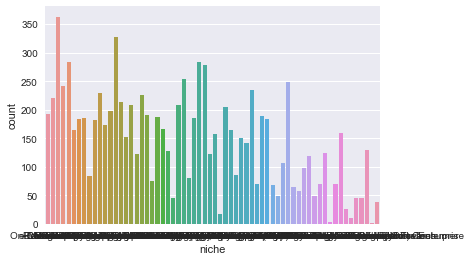

In [60]:
sns.countplot(x='niche', data=combined_results)

In [15]:
#qopts = {'query': 'DigitalOcean', 'filter': '{filter_string}', ...}
qopts = {'query': 'DigitalOcean', 'count':4}
my_query = discovery.query(environ_id, collection_id, qopts)

First get just 'matching_results'. At most 200, or get all of them iA if less than 200.

returned results at highest level is a 2-element dictionary/json

first key: matching_results
second key: results    
results (second key) is a list of json files of number 'count' from the query

In [19]:
len(my_query['results'])

4

In [65]:
company = qopts['query']
companies[companies['Watson Discovery Query Term'] == company]

,Watson Discovery Query Term,Watson Discovery Filter Term,Wiki Page Title,Company,Sales SubSector,Sales Niche,Unnamed: 6
68,DigitalOcean,NaN,Digital Ocean,Digital Ocean,Enterprise Applications,Cloud Infrastructure/Infrastructure as a Service,NaN


In [61]:
subsector = companies[companies['Watson Discovery Query Term'] == company]['Sales SubSector'].item()
subsector

'Enterprise Applications'

In [66]:
niche = companies[companies['Watson Discovery Query Term'] == company]['Sales Niche'].item()
niche

'Cloud Infrastructure/Infrastructure as a Service'

In [69]:
new_entry = {}
new_entry['id'] = my_query['results'][i]['id']
new_entry['title'] = my_query['results'][i]['title']
new_entry['text'] = my_query['results'][i]['text']
new_entry['alchemyapi_text'] = my_query['results'][i]['alchemyapi_text']

In [73]:
pd.DataFrame.from_dict(new_entry,orient='index').T

,id,title,text,alchemyapi_text
0,2bccaffa57aaeed16c017d184da7dfbe,FreshPorts - net/rubygem-fog-digitalocean,"If you buy from Amazon USA, please support us ...",PKGNAME: rubygem-fog-digitalocean\nONLY_FOR_AR...


In [78]:
nb_results

252

In [89]:
#tot_results = my_query['matching_results']
nb_results = len(my_query['results'])

#maybe if tot_results is less than 200 I might have to 1) query with count=1, 2) get tot_results, 
#3) query again with tot_results listed as the count

for i in range(nb_results):
    new_entry = {}
    if my_query['results'][j]['language'] == 'english':
        new_entry['id'] = my_query['results'][j]['id']
        new_entry['title'] = my_query['results'][j]['title']
        new_entry['text'] = my_query['results'][j]['text']
        new_entry['alchemyapi_text'] = my_query['results'][j]['alchemyapi_text']
        new_entry['subsector'] = subsector
        new_entry['niche'] = niche
        new_entry['company'] = company
        
        if i == 0 and j==0:
            news_niches_df = pd.DataFrame.from_dict(new_entry,orient='index').T
            #else df2 = pd.DataFrame(test_companies.ix[i]).T
            #and also result_df = pd.concat([row,df2])
            
        else:
            new_row = pd.DataFrame.from_dict(new_entry,orient='index').T
            news_niches_df = pd.concat([news_niches_df,new_row])
        
    else:
        continue

news_niches_df = news_niches_df.reset_index().drop(['index'],axis=1)
news_niches_df

,id,title,text,alchemyapi_text,subsector,niche,company
0,2bccaffa57aaeed16c017d184da7dfbe,FreshPorts - net/rubygem-fog-digitalocean,"If you buy from Amazon USA, please support us ...",PKGNAME: rubygem-fog-digitalocean\nONLY_FOR_AR...,Enterprise Applications,Cloud Infrastructure/Infrastructure as a Service,DigitalOcean
1,10560a0abbd06e7261f7da7da279c0e1,Arch Rivals - DevOps.com,Where the world meets DevOps\n\nArch Rivals\n\...,Arch Rival...,Enterprise Applications,Cloud Infrastructure/Infrastructure as a Service,DigitalOcean
2,2d1a1e76e5bc3f8bd722a50eed51c84c,"DigitalOcean - Releases Load Balancers, the Ea...",Log in\n\nE-mail\n\nBecome a member for free\n...,"NEW YORK, NY--(Marketwired - Feb 14, 2017) - ...",Enterprise Applications,Cloud Infrastructure/Infrastructure as a Service,DigitalOcean
3,45adb95ce5fa29305e25b03e291d87c7,DigitalOcean Named One of the Coolest Cloud In...,Menu\n\n(202) 540-8337\n\nGet RSS Feed\n\nSubm...,"Joseph Tsidulko, senior editor at CRN, said ab...",Enterprise Applications,Cloud Infrastructure/Infrastructure as a Service,DigitalOcean


In [26]:
#gate storage based on english
my_query['results'][0]['language'] == 'english'

True

In [20]:
my_query['results'][0]['id']

'2bccaffa57aaeed16c017d184da7dfbe'

In [23]:
my_query['results'][0]['title']

'FreshPorts - net/rubygem-fog-digitalocean'

In [31]:
my_query['results'][0]['text']

"If you buy from Amazon USA, please support us by using this link.\n\nPort details\n\nrubygem-fog-digitalocean Module for the 'fog' gem to support DigitalOcean 0.3.0 net =0\n\nMaintainer: sunpoet@FreeBSD.org Port Added: 14 Mar 2017 21:35:27 Also Listed In: rubygems License: MIT Fog::DigitalOcean is a module for the fog gem to support DigitalOcean. WWW: https://github.com/fog/fog-digitaloceanSVNWeb : Homepage : PortsMon\n\nTo install the port: cd /usr/ports/net/rubygem-fog-digitalocean/ && make install clean To add the package: pkg install rubygem-fog-digitalocean\n\nPKGNAME: rubygem-fog-digitalocean\n\nONLY_FOR_ARCHS: nil\n\nNOT_FOR_ARCHS: nil\n\ndistinfo: TIMESTAMP = 1489519224 SHA256 (rubygem/fog-digitalocean-0.3.0.gem) = e6fa84c0a7fc4d3ee611912f40b5e9fe28e555527990f28d345dea8515a94fff SIZE (rubygem/fog-digitalocean-0.3.0.gem) = 47104\n\nNOTE: FreshPorts displays only information on required and default dependencies. Optional dependencies are not covered.\n\nBuild dependencies:\n\nRu

In [32]:
my_query['results'][0]['alchemyapi_text']

'PKGNAME: rubygem-fog-digitalocean\nONLY_FOR_ARCHS: nil\nNOT_FOR_ARCHS: nil\ndistinfo:\nNOTE: FreshPorts displays only information on required and default dependencies.  Optional dependencies are not covered.\nThis port is required by:\n'

In [21]:
discovery_result_to_S3 = json.dumps(my_query)

In [22]:
discovery_result_to_S3

'{"matching_results": 252, "results": [{"id": "2bccaffa57aaeed16c017d184da7dfbe", "score": 3.439208, "yyyymm": "201703", "author": "About the authors", "entities": [], "taxonomy": [{"score": "0.577676", "label": "/technology and computing/programming languages/java"}, {"score": "0.510167", "label": "/law, govt and politics"}, {"confident": "no", "score": "0.190476", "label": "/technology and computing/operating systems/linux"}], "url": "http://www.freshports.org/net/rubygem-fog-digitalocean/", "usage": "By accessing AlchemyAPI or using information generated by AlchemyAPI, you are agreeing to be bound by the AlchemyAPI Terms of Use: http://www.alchemyapi.com/company/terms.html", "enrichedTitle": {"entities": [], "usage": "By accessing AlchemyAPI or using information generated by AlchemyAPI, you are agreeing to be bound by the AlchemyAPI Terms of Use: http://www.alchemyapi.com/company/terms.html", "text": "FreshPorts -- net/rubygem-fog-digitalocean", "concepts": [], "statusInfo": "unsupp

In [41]:
print(news_articles)

{"matching_results": 236, "results": [{"id": "2bccaffa57aaeed16c017d184da7dfbe", "score": 3.4388957, "yyyymm": "201703", "author": "About the authors", "entities": [], "taxonomy": [{"score": "0.577676", "label": "/technology and computing/programming languages/java"}, {"score": "0.510167", "label": "/law, govt and politics"}, {"confident": "no", "score": "0.190476", "label": "/technology and computing/operating systems/linux"}], "url": "http://www.freshports.org/net/rubygem-fog-digitalocean/", "usage": "By accessing AlchemyAPI or using information generated by AlchemyAPI, you are agreeing to be bound by the AlchemyAPI Terms of Use: http://www.alchemyapi.com/company/terms.html", "enrichedTitle": {"entities": [], "usage": "By accessing AlchemyAPI or using information generated by AlchemyAPI, you are agreeing to be bound by the AlchemyAPI Terms of Use: http://www.alchemyapi.com/company/terms.html", "text": "FreshPorts -- net/rubygem-fog-digitalocean", "concepts": [], "statusInfo": "unsupp